# Analyzing Data with Built-in Features of Python

In this small project, you use standard Python features to analyze the Miete data set. The data set contains the data of 1082 households interviewed for the Munich rent standard. A description of the attributes (column titles) is available in [RDocumentation](https://www.rdocumentation.org/packages/kknn/versions/1.3.1/topics/miete). But our data set contains only 16 (not 18) attributes. 

## Initialization

Run the next code cell first, which loads the data set from file `Miete.csv` and converts the data into a nested list `data`. The .csv file and this notebook file should be in the same folder. 

As `data` is a nested list, you can apply list indexing, slicing, comprehensions and enumeration. 

- List indexing is `0`-based.
- `data[0]` returns the attribute names. 
- `data[i]` returns the data of the `i-th` house. For instance, `data[1000]` returns the attributes of the 1000-th house. 
- `data[i][j]` returns the `(j+1)-th` attribute of the `i-th`. For instance, `data[80][2]` returns in which year the 80-th house was built.
- `for v in data[1:]` iterates over all houses in sequence. For instance, `[v[0] for v in data[1:] if v[3]]` returns a list of the rents of the houses with a bath. 

In [1]:
import pandas as pd
from pandas import DataFrame as DF
df = pd.read_csv('Miete.csv')
data = [df.columns.values.tolist()]+df.values.tolist()
# data preprocessing
for i in range(1, len(data)):
    for j in range(0, len(data[1])):
        if j == 0:
            data[i][j] = int(data[i][j] * 100) / 100
            continue
        if j == 12:
            data[i][j] = int(data[i][j] * 1000) / 1000
            continue
        data[i][j] = int(data[i][j])
# outputs the column titles and the first four observations
for i in range(5):
    print(data[i])

['Rent', 'FloorSpace', 'YearBuilt', 'Bath', 'CentralHeating', 'HotWater', 'TiledBath', 'WindowType', 'KitchenType', 'LeaseDuration', 'AgeCategory', 'FloorSpaceCategory', 'NetRentPerSqm', 'Rooms', 'AddressType', 'ResidenceType']
[693.29, 50, 1971, 0, 1, 0, 0, 0, 0, 2, 4, 1, 13.865, 1, 2, 2]
[736.6, 70, 1971, 0, 1, 0, 0, 0, 0, 26, 4, 2, 10.522, 3, 2, 2]
[732.23, 50, 1971, 0, 1, 0, 0, 0, 0, 1, 4, 1, 14.644, 1, 2, 2]
[1295.14, 55, 1893, 0, 1, 0, 0, 0, 0, 0, 1, 2, 23.548, 3, 2, 2]


## Data Retrieval

Use the output of a Python snippet to answer each question. For instance, the output of snippet `data[1][9]` answers question "How long was the lease duration of the first house?" Write your code under the `pass` statement in a TODO code cell.

### Question 1

In which year was the first house in the data set built?

In [2]:
### TODO 1 ####
pass
min([v[2] for v in data[1:]])

1800

### Question 2

How much was the rent of the tenth house in the data set?

In [3]:
### TODO 2 ####
pass
data[10][0]

657.44

### Question 3

How many rooms were there in the last house in the data set?

In [4]:
### TODO 3 ####
pass
data[-1][-3]

2

### Question 4

How much was the rent of each house built before 1880? Return a list of the rents. Sample output: `[644.4, 441.52, 837.9, ...]`. Hint: Use list comprehensions. Note that you should begin with `data[1]`, not `data[0]` as `data[0]` returns attribute names, not attribute values. 

In [5]:
#### TODO 4 ####
pass
[v[0] for v in data[1:] if v[2]<1880]

[644.4, 441.52, 837.9, 1091.09, 808.25]

## Data Aggregation

Use the output of a Python snippet to answer each question. Write your code under the `pass` statement in a TODO code cell. You may call Python built-in functions `sum`, `len`, `min` and `max`. For instance, `max([v[0] for v in data[1:] if not v[3]])` returns the highest rent of the houses without a bathroom; while `sum([v[0] for v in data[1:]]) / len([v[0] for v in data[1:]])` returns the average rent. Do **not** use Numpy or pandas methods.

### Question 5

What was the lowest rent of all houses in the data set?

In [6]:
#### TODO 5 ####
pass
min([v[0] for v in data[1:]])

127.06

### Question 6

What was the standard deviation of the rents?

In [24]:
### Question 6 ####
pass
import numpy as np
np.std([v[0] for v in data[1:]])

408.144904045274

### Question 7

Variable `AgeCategory` has six levels:  1 - built before 1919  2 - built between 1919 and 1948  3 - built between 1949 and 1965  4 - built between 1966 and 1977 5 - built between 1978 and 1983  6 - built after 1983. What was the average rent of the houses built between 1966 and 1977? 

In [8]:
#### TODO 7 ####
pass
sum([v[0] for v in data[1:] if v[10] == 4]) / len([v[0] for v in data[1:] if v[10] == 4])

829.791902654867

### Question 8

Variable `Rooms` shows the number of rooms in a house. Variable `KitchenType` has two levels: 1 - well equipped kitchen  0 - plain kitchen. What was the highest rent of a house with 3 rooms and a well-equipped kitchen?

In [9]:
#### TODO 8 ####
pass
max([v[0] for v in data[1:] if v[-3] == 3 & v[8] == 1])

1183.72

### Question 9

Variable `CentralHeating` has two levels: 1 - yes   0 - no. How many houses had central heating?

In [10]:
#### TODO 9 ###
pass
len([v[4] for v in data[1:] if v[4] == 1])

880

### Question 10

In which year was the house with the highest rent constructed?

In [11]:
#### TODO 10 ####
pass
[v[2] for v in data[1:] if v[0] == max([v[0] for v in data[1:]])]

[1933]

### Question 11

Derive the frequency distribution of the houses in terms of Rooms. Hint: apply the `list.count` method. Sample output:

|\# Rooms   |Frequency |
|:---------:|:---------:|
|1       |137    |
|2       |374    |
|...     |...    |
|8       |0      |
|9       |1      |

In [16]:
#### TODO 11 ####
pass
a = [v[-3] for v in data[1:]]
for i in range(1,max(a)+1):
    n = a.count(i)
    print:("str[i]")

### Question 12

Variable `YearBuilt` shows in which year each house was constructed. What was the average rent of the houses constructed in the 1990s?

In [13]:
#### TODO 12 ####
pass
sum([v[0] for v in data[1:] if 1990 <= v[2] <= 1999]) / len([v[0] for v in data[1:] if 1990 <= v[2] <= 1999])

1356.7849999999999

## Exploratory Data Analysis

In this section, you develop three questions about the `Miete` data set and then answer these questions with Python code. Write each question in the `Question` Markdown cell, and then write code under the `pass` statement in the corresponding TODO code cell. 

### Question 13

*Please use Rent,FloorSpace and Bath to sort Data Miete*

In [51]:
#### TODO 13 ####
pass
df.sort_values(["Rent","FloorSpace","Bath"], axis=0, 
                 ascending=True, inplace=True) 
df

,Rent,FloorSpace,YearBuilt,Bath,CentralHeating,HotWater,TiledBath,WindowType,KitchenType,LeaseDuration,AgeCategory,FloorSpaceCategory,NetRentPerSqm,Rooms,AddressType,ResidenceType
917,127.06,44,1957,0,0,0,0,1,0,3,3,1,2.887727,2,2,1
838,130.70,49,1957,0,1,0,1,1,0,2,3,1,2.667347,2,2,1
296,132.11,84,1893,0,0,0,0,0,0,24,1,3,1.572738,3,2,2
922,143.40,60,1933,1,0,1,0,0,0,14,2,2,2.390000,2,2,2
588,158.00,29,1957,0,1,0,0,0,0,17,3,1,5.448276,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2680.00,145,1971,0,1,0,1,0,1,2,4,3,18.482759,4,3,3
294,2732.53,145,1933,0,1,0,1,0,0,6,2,3,18.845034,5,2,2
793,2764.53,120,1933,0,1,0,1,0,0,2,2,3,23.037750,4,2,3
400,3010.16,164,1893,0,1,0,0,0,0,2,1,3,18.354634,6,2,3


### Question 14

*Write down your question here.*

KeyError: 0

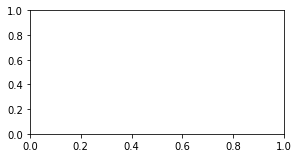

In [79]:
#### TODO 14 ####
pass
def plot_Meite(list, xlabel, ylabel):
    for i in range(len(list)):
        plt.plot(df[list[i]][df_column], label=list[i], lw=1.5)
        plt.setp(plt.gca().get_xticklabels(), FontSize=8, rotation=45)
        plt.legend(loc='upper left')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid('on')
        
fig=plt.figure(figsize=(10,5))
plt.subplot(221)
plot_Meite(df,"Rent","Bath")



### Question 15

What is data[-1][-4] meaning

In [61]:
#### TODO 15 ####
pass
data[-1][-4]


7.942

In [62]:
# THE NetRentPerSqm is 7.942